In [93]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame,pandas
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline 
sns.set(style="darkgrid")
pandas.set_option('display.max_columns', None)

In [94]:
df=pd.read_csv('C:\\Users\\hp\\Downloads\\ibm\\food\\vegcanned.csv')  
fc=df[["Year","Commodity","Supply","Unit","Population","Amount"]]
#Supply is sum of Production,Imports and Beginning stocks
#Amount is supply - (Exports + Ending stocks) , i.e is amount of food used up
fc=fc.dropna()
fc=fc.sort_values("Year")
fc=fc.reset_index(drop=True)

In [95]:
"""making a new dataframe by calculating total amount of food for each year , the population for that year
   and calculating rate of consumption for that year by dividing total food by the population and 365
   to get rate of consumption per person per day"""

'making a new dataframe by calculating total amount of food for each year , the population for that year\n   and calculating rate of consumption for that year by dividing total food by the population and 365\n   to get rate of consumption per person per day'

In [96]:
yr=[]
am=[]
pol=[]
rc=[]
i=1970
while (i<2015):
    su=0
    for x in range(0,len(fc)):
        if fc["Year"][x]==i:
            su+=fc["Amount"][x]
            po=fc["Population"][x]
    yr.append(i)
    am.append(su)
    pol.append(int(po))
    rc.append(((su/po)/365))
    i+=1

In [97]:
tb=pd.DataFrame({"year":yr,"total_amount(pounds)":am,"population":pol,"rate_of_consumption(person/day)":rc})
print (tb)

    year  total_amount(pounds)  population  rate_of_consumption(person/day)
0   1970          19061.728510         205                         0.254686
1   1971          22421.901237         206                         0.297530
2   1972          21837.039708         209                         0.285034
3   1973          20904.635104         211                         0.270272
4   1974          21282.035353         212                         0.273829
5   1975          21083.264663         215                         0.267452
6   1976          22525.112664         218                         0.283040
7   1977          22356.740094         220                         0.278113
8   1978          21582.701382         222                         0.265654
9   1979          22602.898088         225                         0.275158
10  1980          23303.827125         227                         0.280364
11  1981          22312.435308         229                         0.265822
12  1982    

In [98]:
"""plotting population vs total amount of food in pounds
   and year passed vs rate of consumption per person per day"""

'plotting population vs total amount of food in pounds\n   and year passed vs rate of consumption per person per day'

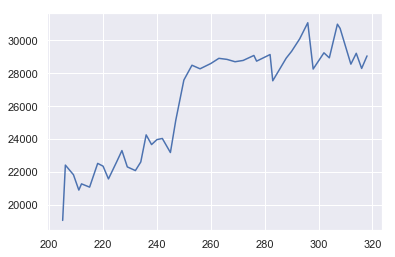

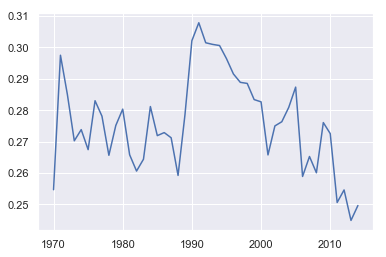

In [99]:
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(tb["population"],tb["total_amount(pounds)"])
ax2 = f2.add_subplot(111)
ax2.plot(tb["year"],tb["rate_of_consumption(person/day)"])

In [100]:
"""in case of a disaster , just multiply the rate of counsumption for that year with the number of people to be supplied
   and the number of days the supply is required i.e [(rate_of_consumption(person/day))*no of people affected*no of days required]"""
# for example if a disaster stuck in 1970 and 200 people were to be supplied for 4 days .....
print ((tb["rate_of_consumption(person/day)"][0])*200*4)

203.74895627089842


In [101]:
df2=pd.read_excel('C:\\Users\\hp\\Downloads\\ibm\\food\\Denmark2.xlsx')  
pc=df2[["Type",2012]]
print (pc)

          Type   2012
0    Emigrants    332
1    Emigrants     34
2    Emigrants    211
3    Emigrants    100
4    Emigrants    149
5    Emigrants    826
6    Emigrants     19
7    Emigrants   1843
8    Emigrants   1537
9    Emigrants   1849
10   Emigrants   1611
11   Emigrants   6859
12   Emigrants   5496
13   Emigrants  12214
14   Emigrants   2831
15   Emigrants   6515
16   Emigrants  27056
17   Emigrants      7
18   Emigrants    170
19   Emigrants    612
20   Emigrants    789
21   Emigrants   6288
22   Emigrants    958
23   Emigrants     ..
24   Emigrants     ..
25   Emigrants    958
26   Emigrants    887
27  Immigrants    993
28  Immigrants    130
29  Immigrants    313
30  Immigrants    162
31  Immigrants    293
32  Immigrants   1891
33  Immigrants     49
34  Immigrants   1834
35  Immigrants   2809
36  Immigrants   3196
37  Immigrants   2573
38  Immigrants  10461
39  Immigrants  10657
40  Immigrants  13603
41  Immigrants   4105
42  Immigrants   5977
43  Immigrants  34342
44  Immigr

In [102]:
# we are considering emigrants and immigrants as tourists and or workers incoming or outgoing per day
s1=0
s2=0
for x in range(0,len(pc)):
    if pc["Type"][x]=="Emigrants": 
        if (type(pc[2012][x]))==int:
            s1+=pc[2012][x]
    elif pc["Type"][x]=="Immigrants":
        if (type(pc[2012][x]))==int:
            s2+=pc[2012][x]

In [103]:
ne=(int((s1/12)/365)) # no of tourists and or workers per day (outgoing)
ni=(int((s2/12)/365)) # no of tourists and or workers per day (incoming) 
n1=[]
n2=[]   
for x in range(0,60):
    n1.append(ne)
    n2.append(ni)

In [104]:
y=random.sample(range(0,59),6)
z=random.sample(range(0,59),6)
print (y,z)

[1, 8, 9, 48, 36, 13] [14, 53, 13, 50, 44, 8]


In [ ]:
"""creating dataframe for incoming and outgoing people"""

In [105]:
for x in range(0,60):
    n1[x]+=random.randint(1,6)
    n2[x]+=random.randint(1,6)
    if x in y:
        n1[x]+=random.randint(50,100)
    if x in z:
        n2[x]+=random.randint(50,100)

In [106]:
fp=pd.DataFrame({"incoming":n2,"outgoing":n1})
print (fp)

    incoming  outgoing
0         25        22
1         29       118
2         26        23
3         27        19
4         25        22
5         29        23
6         29        24
7         24        19
8         79       119
9         28        73
10        28        23
11        28        20
12        27        23
13        91       122
14       117        20
15        28        20
16        26        22
17        25        24
18        24        22
19        29        24
20        26        24
21        26        23
22        27        19
23        28        21
24        26        22
25        27        22
26        28        20
27        26        21
28        29        21
29        29        19
30        25        22
31        24        23
32        25        22
33        27        20
34        26        24
35        26        19
36        26        75
37        28        24
38        29        22
39        26        20
40        24        22
41        25        23
42        2

In [107]:
"""plotting anomaly of incoming and outgoing people per day"""

'plotting anomaly of incoming and outgoing people per day'

In [108]:
m=fp["incoming"].mean()
m2=fp["outgoing"].mean()
an=[]
ind=[]
an2=[]
ind2=[]
for x in range(0,len(fp)):
    if fp["incoming"][x]>m*2:
        an.append(fp["incoming"][x])
        ind.append(x)
    if fp["outgoing"][x]>m2*2:
        an2.append(fp["outgoing"][x])
        ind2.append(x)
df_anomalies=pd.DataFrame({"anomaly":an,"position":ind,"anomaly2":an2,"position2":ind2})
print (df_anomalies)

   anomaly  position  anomaly2  position2
0       79         8       118          1
1       91        13       119          8
2      117        14        73          9
3       81        44       122         13
4      102        50        75         36
5      104        53        85         48


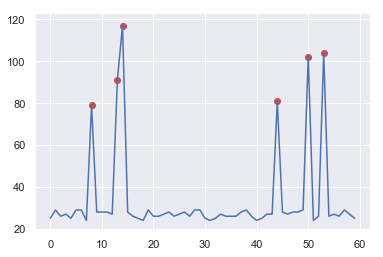

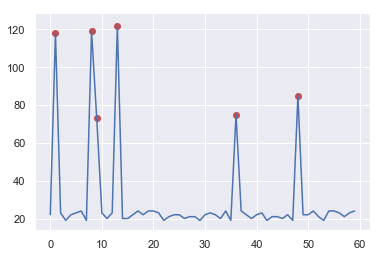

In [109]:
f3 = plt.figure()
f4 = plt.figure()
ax3 = f3.add_subplot(111)
ax3.plot(fp["incoming"])
ax3.scatter(df_anomalies.position, df_anomalies.anomaly, color='r')
ax4 = f4.add_subplot(111)
ax4.plot(fp["outgoing"])
ax4.scatter(df_anomalies.position2, df_anomalies.anomaly2, color='r')

In [110]:
rt=(tb["rate_of_consumption(person/day)"][0])
print (rt)

0.254686195338623


In [111]:
n3=[]
for x in range(0,len(fp)):
    n3.append(205)
    n3[x]+=random.randint(1,6)
fp["population(*1000)"]=n3
print (fp)

    incoming  outgoing  population(*1000)
0         25        22                211
1         29       118                208
2         26        23                206
3         27        19                211
4         25        22                207
5         29        23                208
6         29        24                211
7         24        19                206
8         79       119                209
9         28        73                209
10        28        23                211
11        28        20                208
12        27        23                207
13        91       122                208
14       117        20                208
15        28        20                210
16        26        22                211
17        25        24                210
18        24        22                210
19        29        24                211
20        26        24                206
21        26        23                207
22        27        19            

In [112]:
"""finding out no of days the current stocks will last based on the current population , 
   rate of consumption (amount per day consumed by entire population of the area)"""

'finding out no of days the current stocks will last based on the current population , \n   rate of consumption (amount per day consumed by entire population of the area)'

In [113]:
dl=[]
cs=[]
days=[]
for x in range(0,len(fp)):
    dl.append(int(rt*(fp["population(*1000)"][x]+fp["incoming"][x]-fp["outgoing"][x])))
    cs.append(2116+100) # assuming current stocks to be 2116 pounds and adding surplus of 100 pounds
    days.append(int(cs[x]/dl[x]))
rf=pd.DataFrame({"amount/day(pounds)":dl,"current_stocks":cs,"days_left":days})
print (rf)

    amount/day(pounds)  current_stocks  days_left
0                   54            2216         41
1                   30            2216         73
2                   53            2216         41
3                   55            2216         40
4                   53            2216         41
5                   54            2216         41
6                   55            2216         40
7                   53            2216         41
8                   43            2216         51
9                   41            2216         54
10                  55            2216         40
11                  55            2216         40
12                  53            2216         41
13                  45            2216         49
14                  77            2216         28
15                  55            2216         40
16                  54            2216         41
17                  53            2216         41
18                  53            2216         41


In [114]:
"""calculating the food stocks needed in order to fullfil the needs for the population residing in the 
   affected area (everything is in pounds)"""

'calculating the food stocks needed in order to fullfil the needs for the population residing in the \n   affected area (everything is in pounds)'

In [115]:
dd=[]
stk=[]
for x in range(0,len(fp)):
    dlfd=(rf["days_left"][x]+random.randint(1,6))
    dd.append(dlfd-rf["days_left"][x])
    stk.append(rt*dd[x]*fp["population(*1000)"][x])
rf["days_left_for_disaster"]=dd
rf["stock_needed(pounds)"]=stk
print (rf)

    amount/day(pounds)  current_stocks  days_left  days_left_for_disaster  \
0                   54            2216         41                       1   
1                   30            2216         73                       3   
2                   53            2216         41                       5   
3                   55            2216         40                       1   
4                   53            2216         41                       3   
5                   54            2216         41                       3   
6                   55            2216         40                       3   
7                   53            2216         41                       2   
8                   43            2216         51                       1   
9                   41            2216         54                       4   
10                  55            2216         40                       5   
11                  55            2216         40                       4   